Importing Libraries:

In [117]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline
import seaborn as sns

Reading and Checking Data of Stock Dataset:

In [118]:
data = pd.read_csv("GC=F.csv")
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-04-16,1731.000000,1750.599976,1715.000000,1720.400024,1720.400024,162.0
1,2020-04-17,1715.699951,1725.000000,1684.900024,1689.199951,1689.199951,223.0
2,2020-04-20,1686.000000,1701.599976,1680.000000,1701.599976,1701.599976,106.0
3,2020-04-21,1697.000000,1707.099976,1659.900024,1678.199951,1678.199951,666.0
4,2020-04-22,1696.000000,1728.699951,1684.800049,1728.699951,1728.699951,453.0


In [119]:
data.shape

(253, 7)

In [120]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253 entries, 0 to 252
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       253 non-null    object 
 1   Open       251 non-null    float64
 2   High       251 non-null    float64
 3   Low        251 non-null    float64
 4   Close      251 non-null    float64
 5   Adj Close  251 non-null    float64
 6   Volume     251 non-null    float64
dtypes: float64(6), object(1)
memory usage: 14.0+ KB


In [121]:
data.nunique()

Date         253
Open         243
High         239
Low          240
Close        241
Adj Close    241
Volume       221
dtype: int64

In [122]:
list_columns = data.columns
list_columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [123]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,251.000000,251.000000,251.000000,251.000000,251.000000,251.000000
mean,1826.641437,1837.254984,1815.535458,1826.500796,1826.500796,4535.438247
std,89.594132,90.503903,88.512745,89.368382,89.368382,25295.057737
min,1679.099976,1699.400024,1659.900024,1676.199951,1676.199951,4.000000
25%,1737.500000,1745.700012,1726.299988,1733.950012,1733.950012,137.000000
50%,1834.800049,1843.300049,1826.500000,1834.599976,1834.599976,329.000000
75%,1896.250000,1908.000000,1884.400024,1899.399964,1899.399964,766.500000
max,2045.500000,2063.000000,2040.000000,2051.500000,2051.500000,209835.000000


In [ ]:
Heatmap using Statistical Information of the dataframe:

Text(0.5, 1.0, 'Heatmap')

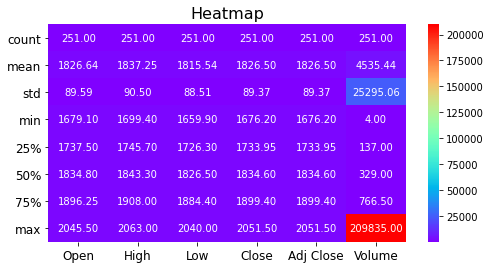

In [124]:
plt.figure(figsize=(8,4))
sns.heatmap(data.describe(), annot = True, fmt = '.2f', cmap = 'rainbow')
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.title("Heatmap", fontsize = 16)

In [125]:
data.isnull().sum()

Date         0
Open         2
High         2
Low          2
Close        2
Adj Close    2
Volume       2
dtype: int64

In [126]:
data.dropna(inplace=True)

In [127]:
data.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [128]:
data.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume       float64
dtype: object

In [129]:
data['Date'] = pd.to_datetime(data['Date'] ,format='%Y-%m-%d')
data.index = data['Date']

History of trading open price:

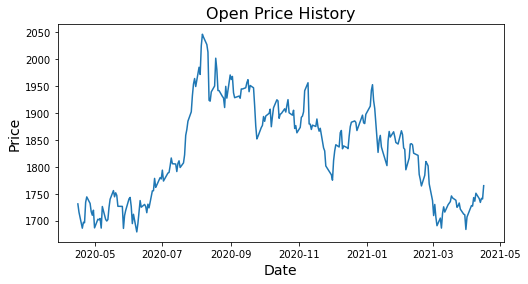

In [130]:
plt.figure(figsize=(8,4))
plt.plot(data['Date'], data['Open'])
plt.title("Open Price History", fontsize = 16)
plt.xlabel("Date", fontsize = 14)
plt.ylabel("Price", fontsize = 14)
plt.show()

History of trading close price:

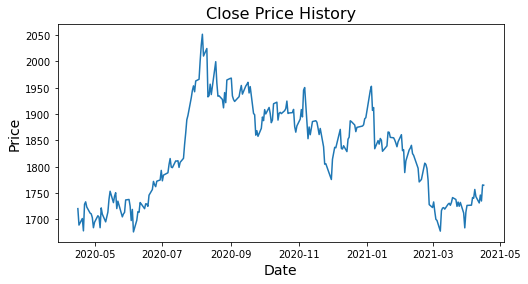

In [131]:
plt.figure(figsize=(8,4))
plt.plot(data['Date'], data['Close'])
plt.title("Close Price History", fontsize = 16)
plt.xlabel("Date", fontsize = 14)
plt.ylabel("Price", fontsize = 14)
plt.show()


History of stock price growth:

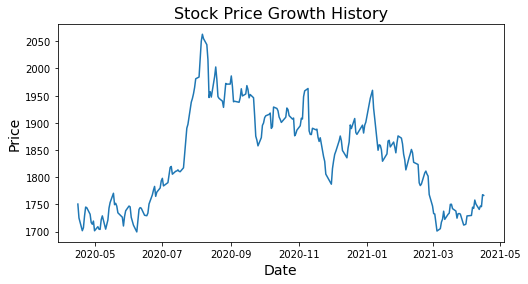

In [132]:
plt.figure(figsize=(8,4))
plt.plot(data['Date'], data['High'])
plt.title("Stock Price Growth History", fontsize = 16)
plt.xlabel("Date", fontsize = 14)
plt.ylabel("Price", fontsize = 14)
plt.show()

History of low stock price:

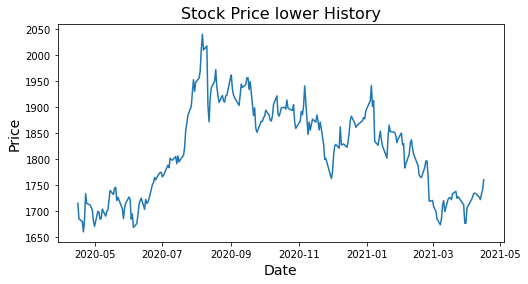

In [133]:
plt.figure(figsize=(8,4))
plt.plot(data['Date'], data['Low'])
plt.title("Stock Price lower History", fontsize = 16)
plt.xlabel("Date", fontsize = 14)
plt.ylabel("Price", fontsize = 14)
plt.show()

History of adjusted close stock price:

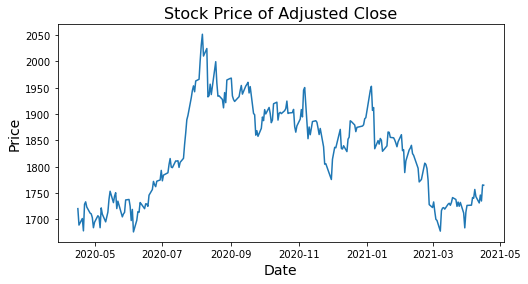

In [134]:
plt.figure(figsize=(8,4))
plt.plot(data['Date'], data['Adj Close'])
plt.title("Stock Price of Adjusted Close", fontsize = 16)
plt.xlabel("Date", fontsize = 14)
plt.ylabel("Price", fontsize = 14)
plt.show()

History of stock price volume:

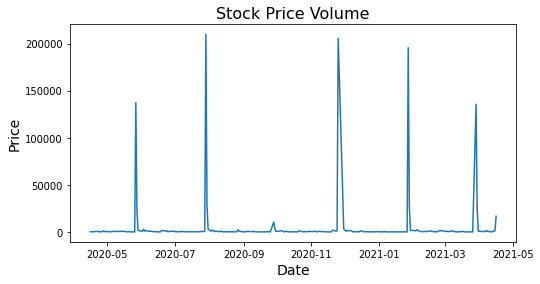

In [135]:
plt.figure(figsize=(8,4))
plt.plot(data['Date'], data['Volume'])
plt.title("Stock Price Volume", fontsize = 16)
plt.xlabel("Date", fontsize = 14)
plt.ylabel("Price", fontsize = 14)
plt.show()

Stock market volume price Prediction:

Assigning values for x and y:

In [136]:
x = data.iloc[:, 1:7].values
y = data.iloc[:, -1].values


Splitting the dataset using train_test_split:

In [137]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 1/3, random_state = 0)

Standard Scale transform:

In [138]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

Random Forest Regression model training on the Training set:

In [139]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
regressor.fit(x_train, y_train)

print("The Random Forest Regression model trained")

The Random Forest Regression model trained


In [140]:
y_pred = regressor.predict(x_test)
y_pred

array([1.695400e+03, 3.424000e+02, 2.902000e+02, 1.623400e+03,
       9.000000e+00, 1.399100e+03, 5.540000e+01, 7.340000e+01,
       1.510000e+02, 7.505000e+02, 1.025000e+03, 1.460000e+01,
       4.140000e+01, 1.508000e+02, 6.010000e+02, 1.847620e+04,
       1.838000e+02, 2.550000e+02, 1.260000e+02, 1.911000e+02,
       3.003400e+03, 1.320600e+03, 2.346910e+04, 9.000000e+00,
       1.286800e+03, 7.530000e+01, 1.282800e+03, 1.725000e+02,
       4.769000e+02, 6.885000e+02, 5.540000e+01, 1.974300e+03,
       3.306000e+02, 4.919000e+02, 2.608000e+02, 2.305000e+02,
       1.129000e+02, 4.769000e+02, 2.283000e+02, 3.210000e+01,
       5.256000e+02, 3.278000e+02, 6.860000e+01, 1.645000e+02,
       1.856000e+02, 7.350000e+01, 1.597300e+03, 1.096000e+02,
       2.030000e+01, 1.167000e+02, 8.091000e+02, 1.207600e+03,
       3.306000e+02, 6.642000e+02, 2.281000e+02, 2.296000e+02,
       4.930000e+01, 3.340000e+02, 2.365000e+02, 8.456000e+02,
       4.800000e+00, 2.702200e+03, 1.680000e+02, 7.2790

In [ ]:
Visualizing the Train Result:

In [141]:
df = pd.DataFrame()
df

""


In [142]:
Pred_x_train = regressor.predict(x_train)

df['predict_train'] = Pred_x_train
df['predict_train']

0       52.0
1      414.0
2      335.2
3      324.4
4       77.5
       ...  
162    215.0
163      6.4
164    729.2
165    666.1
166    135.4
Name: predict_train, Length: 167, dtype: float64

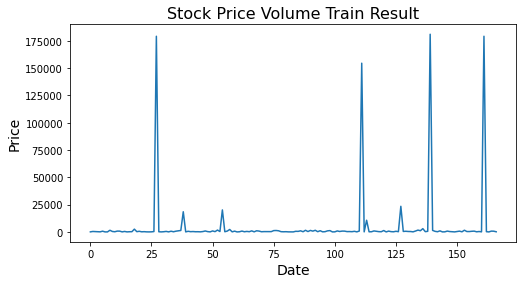

In [143]:
plt.figure(figsize=(8,4))
plt.plot(df['predict_train'])
plt.title("Stock Price Volume Train Result", fontsize = 16)
plt.xlabel("Date", fontsize = 14)
plt.ylabel("Price", fontsize = 14)
plt.show()

Visualizing the Test Result:

In [144]:
df1 = pd.DataFrame()
df1

""


In [145]:
df1['predict'] = y_pred
df1['predict']

0     1695.4
1      342.4
2      290.2
3     1623.4
4        9.0
       ...  
79     334.4
80      89.0
81     971.5
82     118.3
83      10.0
Name: predict, Length: 84, dtype: float64

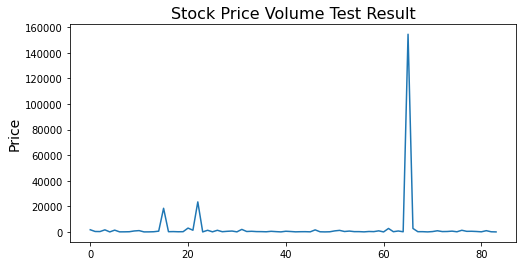

In [146]:
plt.figure(figsize=(8,4))
plt.plot(df1['predict'])
plt.title("Stock Price Volume Test Result", fontsize = 16)
plt.ylabel("Price", fontsize = 14)
plt.show()

Accuracy of model:

In [147]:
print("Accuracy score : ", np.mean(y_pred==y_test))

Accuracy score :  0.0


Reading and Checking dataset of India News:

In [151]:
news_df = pd.read_csv('india-news-headlines.csv')
news_df.head()

,publish_date,headline_category,headline_text
0,20010102,unknown,Status quo will not be disturbed at Ayodhya; s...
1,20010102,unknown,Fissures in Hurriyat over Pak visit
2,20010102,unknown,America's unwanted heading for India?
3,20010102,unknown,For bigwigs; it is destination Goa
4,20010102,unknown,Extra buses to clear tourist traffic


In [152]:
news_df.shape

(3424067, 3)

In [153]:
news_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3424067 entries, 0 to 3424066
Data columns (total 3 columns):
 #   Column             Dtype 
---  ------             ----- 
 0   publish_date       int64 
 1   headline_category  object
 2   headline_text      object
dtypes: int64(1), object(2)
memory usage: 78.4+ MB


In [154]:
news_df.dtypes

publish_date          int64
headline_category    object
headline_text        object
dtype: object

In [155]:
news_df['headline_text']

0          Status quo will not be disturbed at Ayodhya; s...
1                        Fissures in Hurriyat over Pak visit
2                      America's unwanted heading for India?
3                         For bigwigs; it is destination Goa
4                       Extra buses to clear tourist traffic
                                 ...                        
3424062    Covid-19: Despite dip in cases; Rajasthan amon...
3424063    Covid-19: Despite dip in cases; Rajasthan amon...
3424064    Covid-19: Despite dip in cases; Rajasthan amon...
3424065    Govt extends deadline for use of FASTag till F...
3424066    Celebs plan to party safely and responsibly on...
Name: headline_text, Length: 3424067, dtype: object

Removing Duplicates:

In [156]:
news_df.drop('headline_category', axis=1, inplace=True)
news_df['publish_date'] = pd.to_datetime(news_df['publish_date'], format='%Y%m%d')
news_df.head()

,publish_date,headline_text
0,2001-01-02,Status quo will not be disturbed at Ayodhya; s...
1,2001-01-02,Fissures in Hurriyat over Pak visit
2,2001-01-02,America's unwanted heading for India?
3,2001-01-02,For bigwigs; it is destination Goa
4,2001-01-02,Extra buses to clear tourist traffic


In [157]:
news_df.rename(columns={'publish_date': 'Date'}, inplace = True)

news_df = news_df.drop_duplicates()
news_df.reset_index(inplace=True, drop=True)
news_df.head()

,Date,headline_text
0,2001-01-02,Status quo will not be disturbed at Ayodhya; s...
1,2001-01-02,Fissures in Hurriyat over Pak visit
2,2001-01-02,America's unwanted heading for India?
3,2001-01-02,For bigwigs; it is destination Goa
4,2001-01-02,Extra buses to clear tourist traffic


Importing TextBlob:

In [158]:
from textblob import TextBlob

def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

def getPolarity(text):
    return TextBlob(text).sentiment.polarity

news_df['Subjectivity'] = news_df['headline_text'].apply(getSubjectivity)
news_df['Polarity'] = news_df['headline_text'].apply(getPolarity)
news_df.head()

,Date,headline_text,Subjectivity,Polarity
0,2001-01-02,Status quo will not be disturbed at Ayodhya; s...,0.000000,0.00
1,2001-01-02,Fissures in Hurriyat over Pak visit,0.000000,0.00
2,2001-01-02,America's unwanted heading for India?,0.000000,0.00
3,2001-01-02,For bigwigs; it is destination Goa,0.000000,0.00
4,2001-01-02,Extra buses to clear tourist traffic,0.241667,0.05


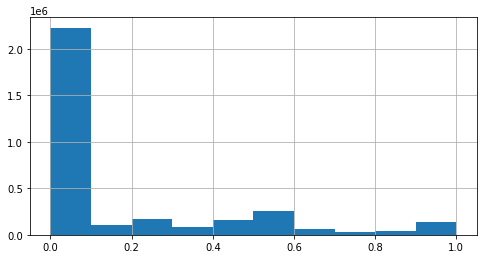

In [159]:
plt.figure(figsize = (8,4))
news_df['Subjectivity'].hist()
plt.show()

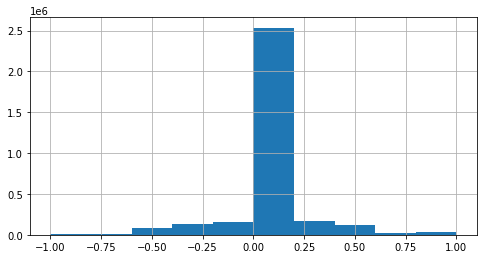

In [160]:
plt.figure(figsize = (8,4))
news_df['Polarity'].hist()
plt.show()

SentimentIntensity Analyzer:

In [165]:
pip install vaderSentiment

     |████████████████████████████████| 133kB 5.5MB/s 


In [166]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer 

senti_ana = SentimentIntensityAnalyzer()

news_df['compound'] = [senti_ana.polarity_scores(i)['compound'] for i in news_df['headline_text']]
news_df['Negative'] = [senti_ana.polarity_scores(i)['neg'] for i in news_df['headline_text']]
news_df['Neutral'] = [senti_ana.polarity_scores(i)['neu'] for i in news_df['headline_text']]
news_df['Positive'] = [senti_ana.polarity_scores(i)['pos'] for i in news_df['headline_text']]

news_df.head()

,Date,headline_text,Subjectivity,Polarity,compound,Negative,Neutral,Positive
0,2001-01-02,Status quo will not be disturbed at Ayodhya; s...,0.000000,0.00,0.2924,0.000,0.805,0.195
1,2001-01-02,Fissures in Hurriyat over Pak visit,0.000000,0.00,0.0000,0.000,1.000,0.000
2,2001-01-02,America's unwanted heading for India?,0.000000,0.00,-0.2263,0.322,0.678,0.000
3,2001-01-02,For bigwigs; it is destination Goa,0.000000,0.00,0.0000,0.000,1.000,0.000
4,2001-01-02,Extra buses to clear tourist traffic,0.241667,0.05,0.3818,0.000,0.658,0.342
